In [7]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, y):
    return (x**2 + y**2 + 5*np.sin(x)*np.cos(y))

# Definir o gradiente da função
def gradiente(x, y):
    grad_x = 2*x + 5*np.cos(x)*np.cos(y)
    grad_y = 2*y - 5*np.sin(x)*np.sin(y)
    return np.array([grad_x, grad_y])


# Valores para o grid do gráfico
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)



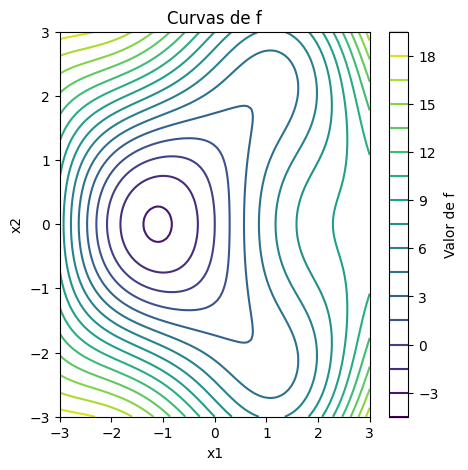

In [8]:
# Plotando cada gráfico separadamente e ajustando a cor da seta para azul

# Gráfico 1: Somente a função com curvas de nível
plt.figure(figsize=(5, 5))
contour1 = plt.contour(X, Y,  Z, levels=20, cmap="viridis")
plt.colorbar(contour1, label="Valor de f")
plt.title("Curvas de f")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


Numero de iterações até convergência: 101
Ponto inicial: [0.84656646 2.09495257]
[0.28332394 1.39400033]


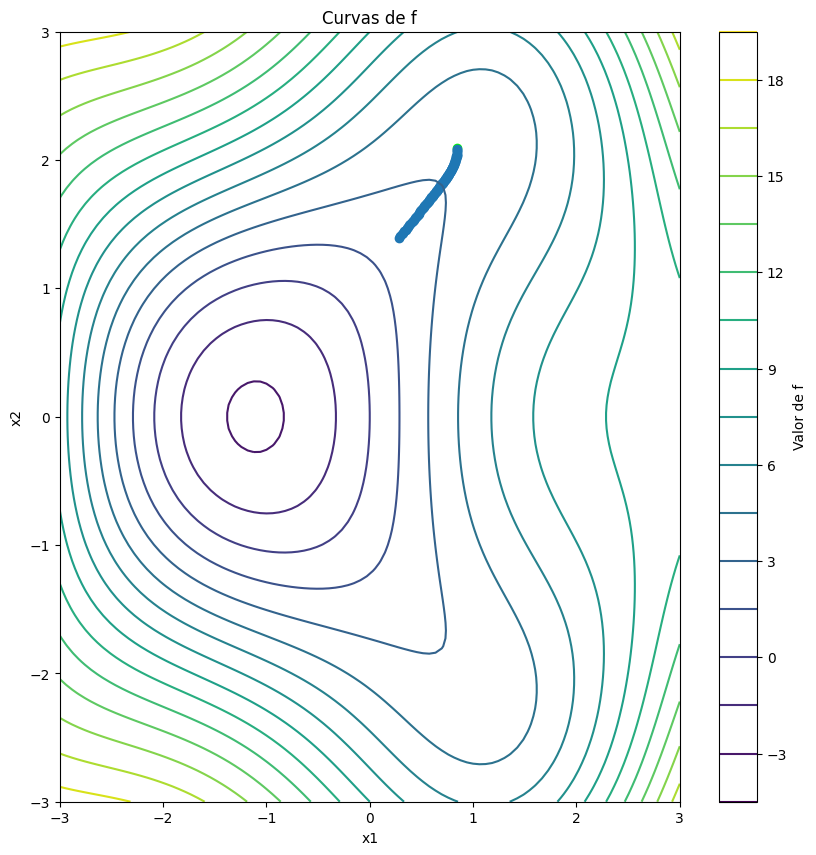

In [102]:

# Novo ponto após uma iteração de máxima descida
def grad_desc(ponto_inicial,n_iteracoes,alpha,gradiente):

    lista_pontos = [ponto_inicial]
    for i in range(0,n_iteracoes):
        direcao = gradiente(*lista_pontos[-1])
        passo = -alpha*(direcao)
        lista_pontos.append(lista_pontos[-1] + passo)        
        
        if np.linalg.norm(direcao) <=0.001:
            return lista_pontos
    return lista_pontos


lista_pontos = grad_desc(3*np.random.random(2),100,0.01,gradiente)

print("Numero de iterações até convergência: {}\n"
     "Ponto inicial: {}".format(len(lista_pontos),lista_pontos[0]))
print(lista_pontos[-1])
plt.figure(figsize=(10, 10))
contour1 = plt.contour(X, Y,  Z, levels=20, cmap="viridis")
plt.colorbar(contour1, label="Valor de f")
plt.title("Curvas de f")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(*lista_pontos[0],c='lime')

for i in range(1,len(lista_pontos)):
    plt.quiver(*lista_pontos[i-1], *(lista_pontos[i] - lista_pontos[i-1]),angles='xy',scale_units='xy',scale=1)
lista_pontos.pop(0)
plt.scatter(*zip(*lista_pontos))

plt.show()


    

alpha = 0.4081632653061224
alpha = 0.2040816326530612
alpha = 0.16326530612244897
alpha = 0.16326530612244897
alpha = 0.16326530612244897
alpha = 0.16326530612244897
Numero de iterações até convergência: 7
Ponto inicial: [1.04547341 0.42227594]
[-1.11050970e+00  1.49994064e-08]


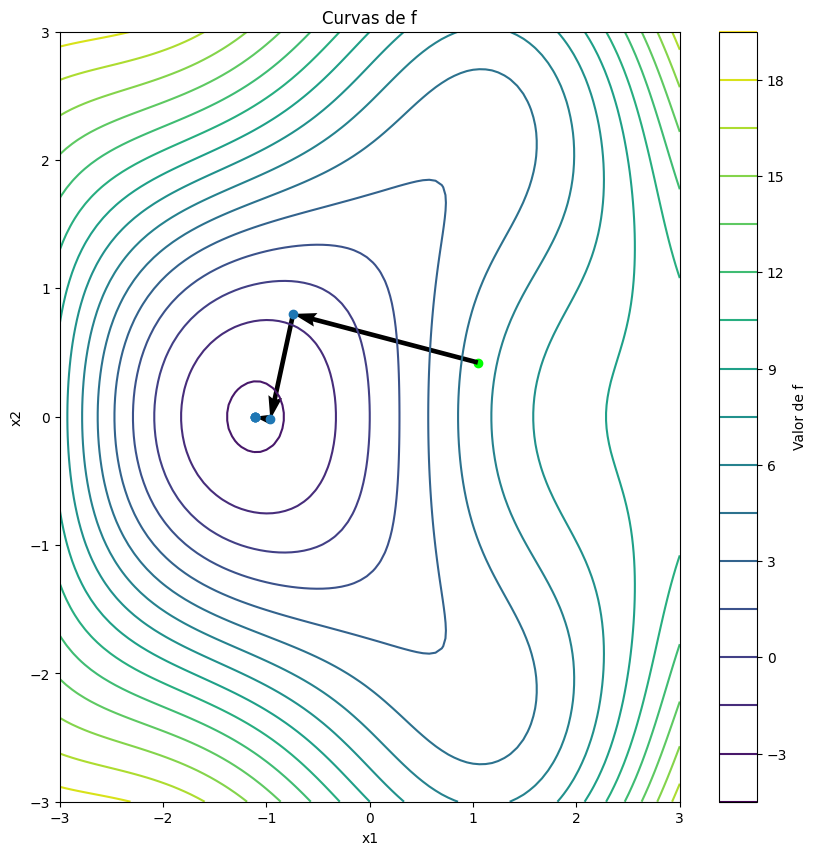

In [103]:
#testando busca linear exata


# Novo ponto após uma iteração de máxima descida
def grad_desc_exato(ponto_inicial,n_iteracoes,f,gradiente):

    lista_pontos = [ponto_inicial]
    for i in range(0,n_iteracoes):
        direcao = gradiente(*lista_pontos[-1])


        #determinar alpha
        alpha = get_alpha(f,lista_pontos[-1],direcao)
        print("alpha = {}".format(alpha))
        passo = -alpha*(direcao)
        lista_pontos.append(lista_pontos[-1] + passo)        
        
        if np.linalg.norm(direcao) <=0.001:
            return lista_pontos
    return lista_pontos

def get_alpha(f,ponto_partida,direcao):
    x_vals = np.linspace(0,2,50)
    y_vals = np.array([ f(*(ponto_partida -x*direcao)) for x in x_vals])

    
    return x_vals[y_vals.argmin()];
            
        
    


lista_pontos = grad_desc_exato(3*np.random.random(2),100,f,gradiente)

print("Numero de iterações até convergência: {}\n"
     "Ponto inicial: {}".format(len(lista_pontos),lista_pontos[0]))
print(lista_pontos[-1])
plt.figure(figsize=(10, 10))
contour1 = plt.contour(X, Y,  Z, levels=20, cmap="viridis")
plt.colorbar(contour1, label="Valor de f")
plt.title("Curvas de f")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(*lista_pontos[0],c='lime')

for i in range(1,len(lista_pontos)):
    plt.quiver(*lista_pontos[i-1], *(lista_pontos[i] - lista_pontos[i-1]),angles='xy',scale_units='xy',scale=1)
lista_pontos.pop(0)
plt.scatter(*zip(*lista_pontos))

plt.show()


    